#Car Price Predictor using ML

---



Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car_data=pd.read_csv('/content/quikr_car - quikr_car.csv')

In [ ]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car_data.shape

(892, 6)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
car_data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
backup=car_data.copy()

In [ ]:
#year has many non-year values
car_data=car_data[car_data['year'].str.isnumeric()]

#year is in object. Change to integer
car_data['year']=car_data['year'].astype(int)

#Price has Ask for Price
car_data=car_data[car_data['Price']!='Ask For Price']

#Price has commas in its prices and is in object
car_data['Price']=car_data['Price'].str.replace(',','').astype(int)

#kms_driven has object values with kms at last.
car_data['kms_driven']=car_data['kms_driven'].str.split().str.get(0).str.replace(',','')

#It has nan values and two rows have 'Petrol' in them
car_data=car_data[car_data['kms_driven'].str.isnumeric()]
car_data['kms_driven']=car_data['kms_driven'].astype(int)

#fuel_type has nan values
car_data=car_data[~car_data['fuel_type'].isna()]


<ipython-input-8-21f45891942b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['year']=car_data['year'].astype(int)


In [ ]:
car_data.shape

(816, 6)

Name and company had spammed data...but with the previous cleaning, those rows got removed.

Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [ ]:
car_data['name']=car_data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

Resetting the index of the final cleaned data


In [ ]:
car_data=car_data.reset_index(drop=True)

#Cleaned Data

In [ ]:
car_data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car_data.to_csv('Cleaned_Car_data.csv')

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [ ]:
car_data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [ ]:
car_data=car_data[car_data['Price']<6000000]

#CHECKING REALTIONSHIP OF COMPANY WITH PRICE BY USING VISUALIZATION

In [ ]:
car_data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

VISUALIZATION USING SEABORN

In [ ]:
import seaborn as sns

<ipython-input-19-aa7ce42ad148>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


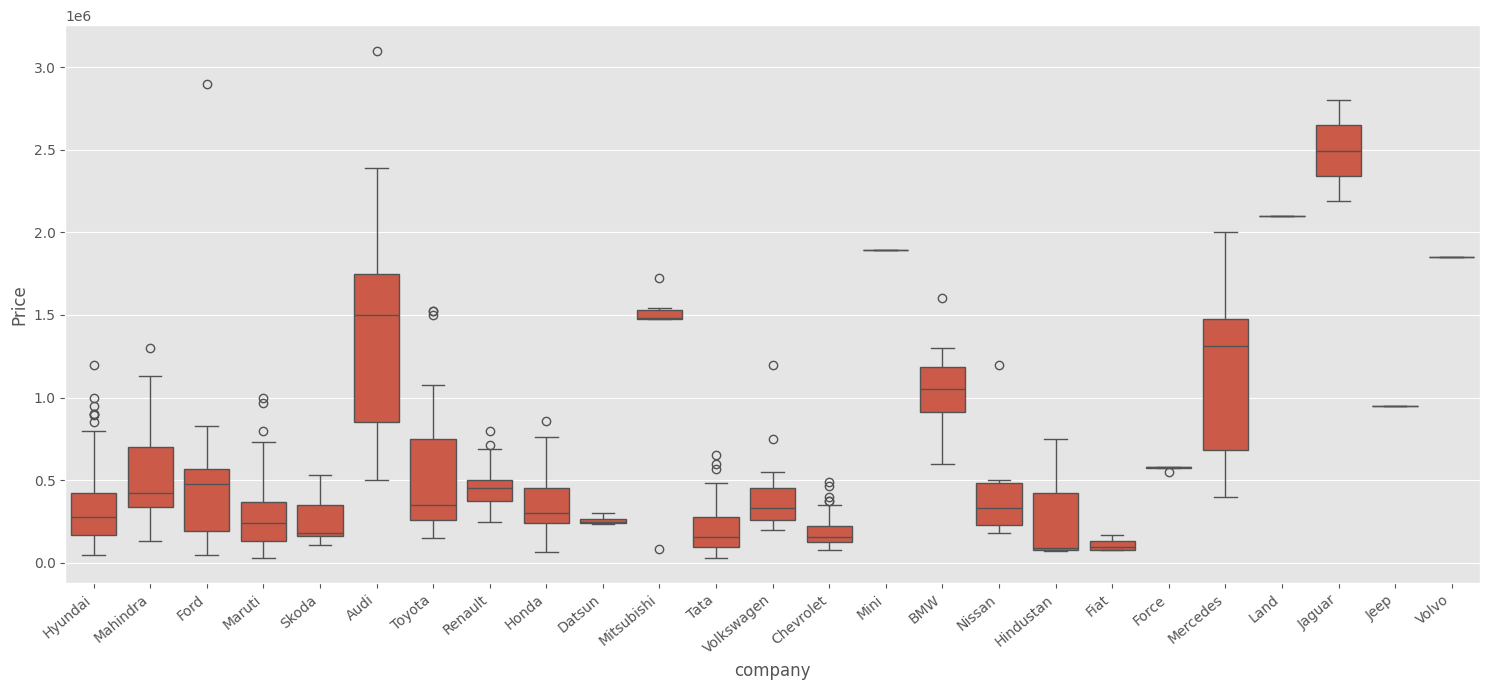

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=car_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

#CHECKING RELATIONSHIP OF YEAR WITH PRICE

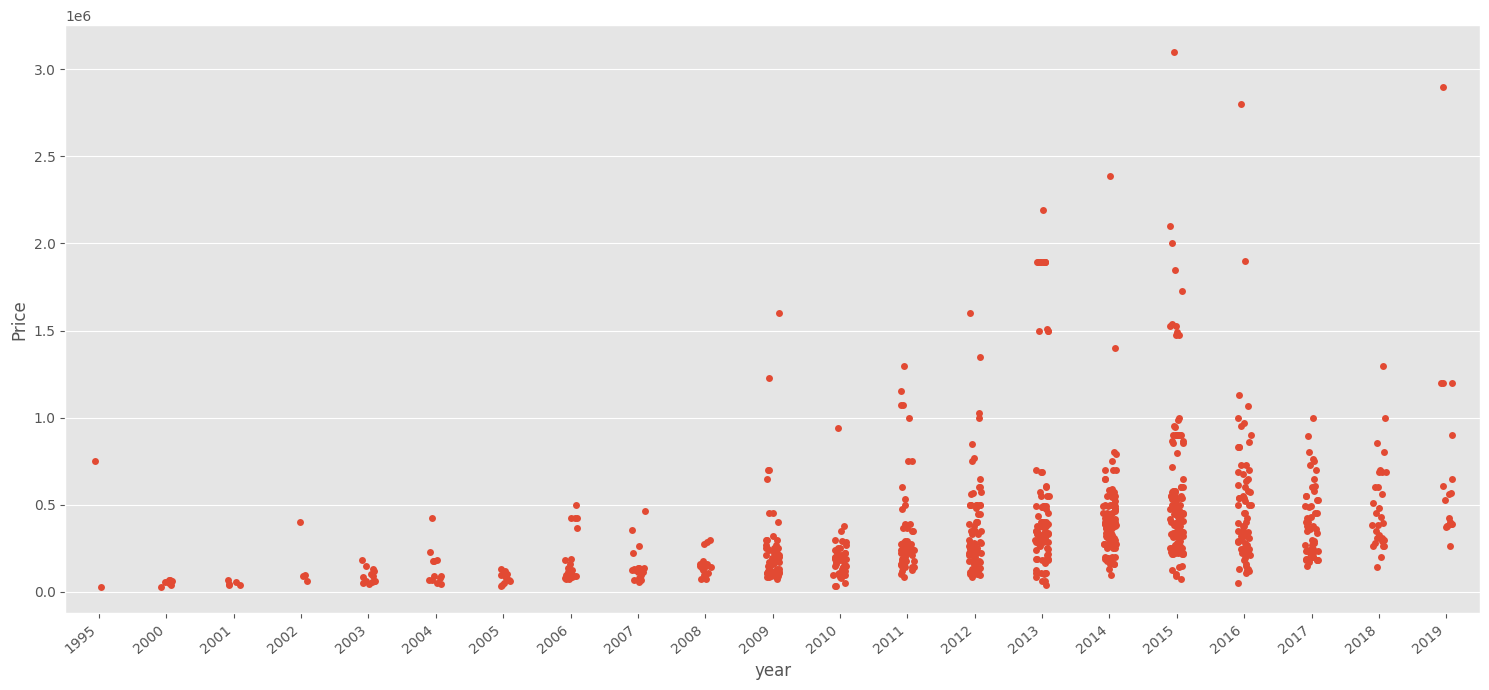

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.stripplot(x='year', y='Price', data=car_data, jitter=True)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

plt.show()

#CHECKHING RELATIONSHIP OF KMs_DRIVEN WITH PRICE

<Figure size 1500x700 with 0 Axes>

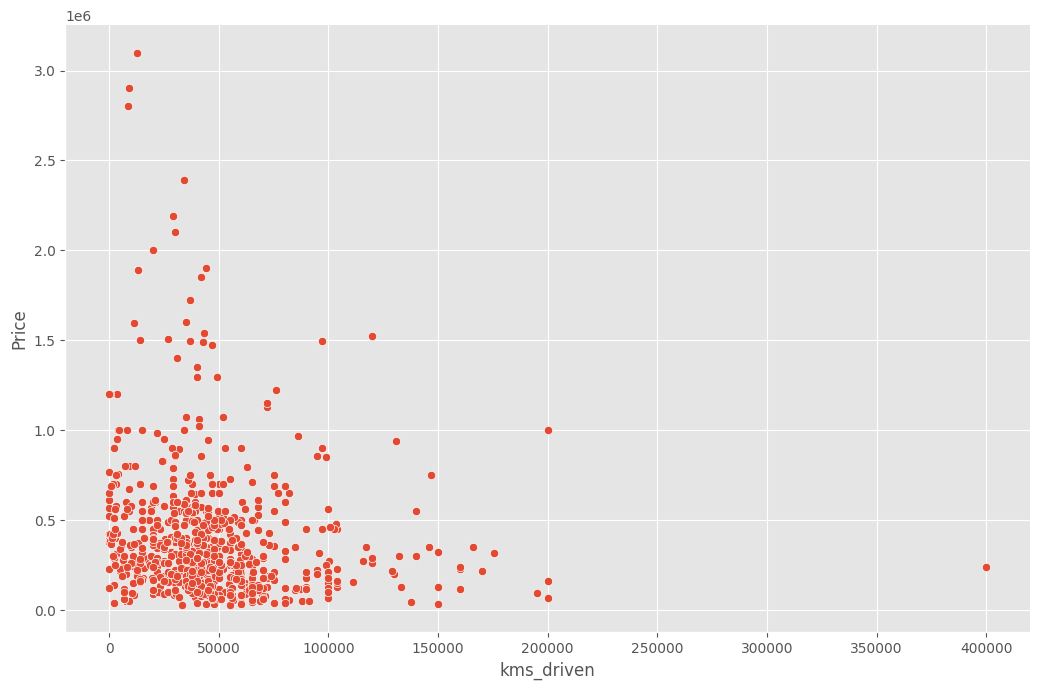

In [ ]:
plt.figure(figsize=(15, 7))
sns.relplot(x='kms_driven',y='Price',data=car_data,height=7,aspect=1.5)

#CHECKING RELATIONSHIP OF FUEL TYPE WITH PRICE

<Axes: xlabel='fuel_type', ylabel='Price'>

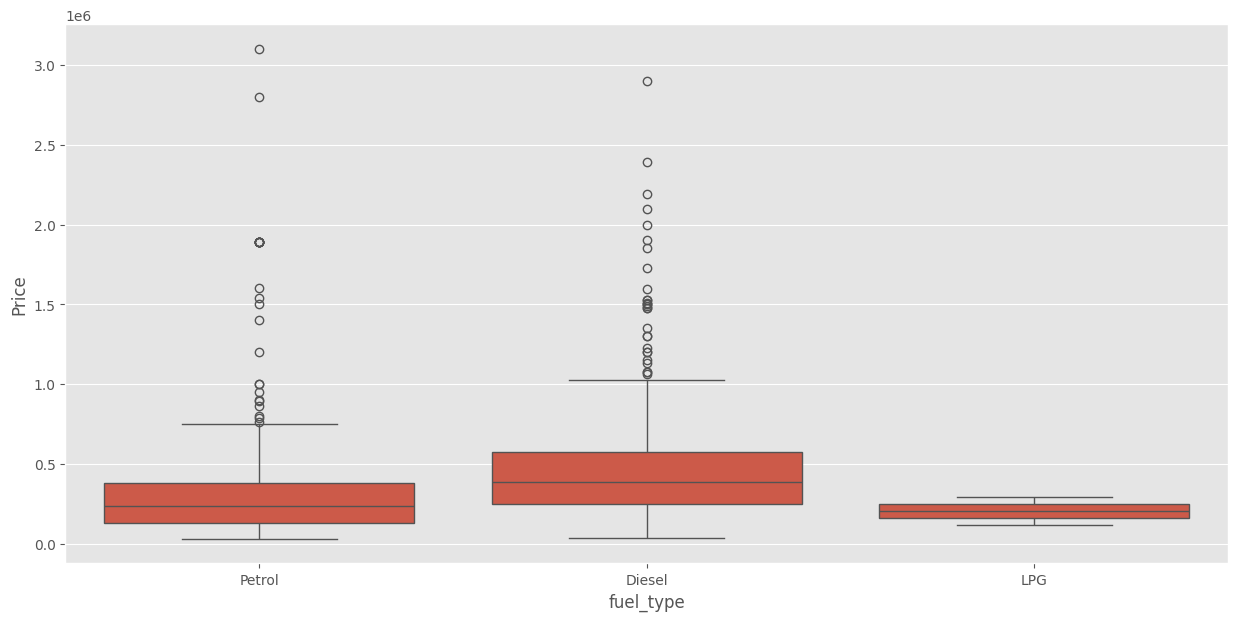

In [ ]:
plt.subplots(figsize=(15,7))
sns.boxplot(x='fuel_type',y='Price',data=car_data)

#RELATIONSHIP OF PRICE WITH FUELTYPE,YEAR AND COMAPNY MIXED

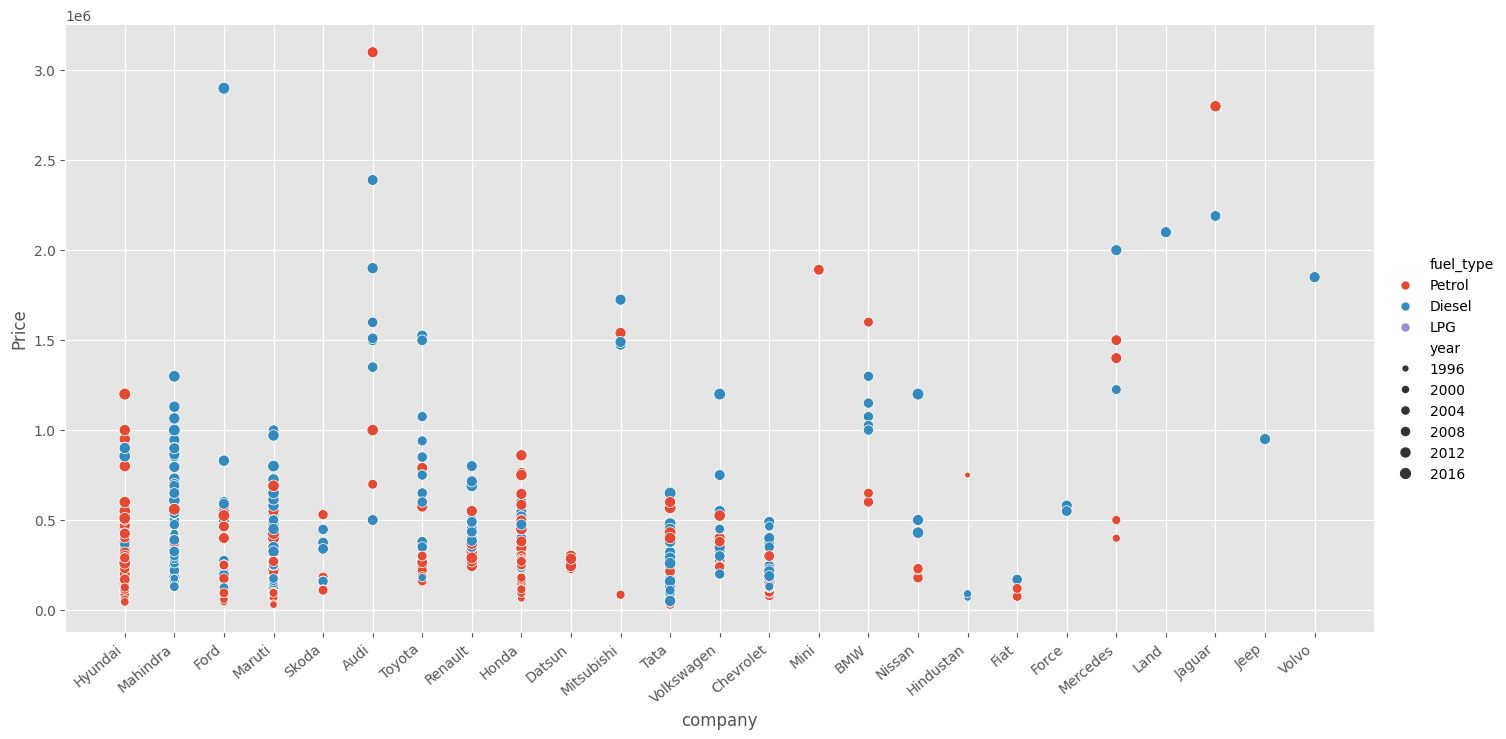

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car_data,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

#Extracting Training Data

In [ ]:
X=car_data[['name','company','year','kms_driven','fuel_type']]
y=car_data['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape

(815,)

#Applying Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=302)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#Linear Regression Model

In [ ]:
lr=LinearRegression()

#Making a pipeline

In [ ]:
pipe=make_pipeline(column_trans,lr)

#Fitting the model

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

#Checking R2 Score

In [ ]:
r2_score(y_test,y_pred)

0.7634623096918358

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

302

In [ ]:
scores[np.argmax(scores)]

0.8991190499074018

In [ ]:
def take_user_input():
    car_model = input("Enter the car model (e.g., 'Maruti Suzuki Swift'): ")
    car_company = input("Enter the car company (e.g., 'Maruti'): ")
    year = int(input("Enter the manufacturing year (e.g., 2019): "))
    kms_driven = int(input("Enter the kilometers driven (e.g., 100): "))
    fuel_type = input("Enter the fuel type (e.g., 'Petrol'): ")

    user_data = [car_model, car_company, year, kms_driven, fuel_type]
    return user_data

# Take input from the user
user_input = take_user_input()

# Create a DataFrame with the user input
user_input_df = pd.DataFrame(columns=X_test.columns, data=np.array(user_input).reshape(1, 5))

# Make prediction
prediction = pipe.predict(user_input_df)

print(f"\nThe predicted price is: {prediction[0]}")

Enter the car model (e.g., 'Maruti Suzuki Swift'): Audi A8
Enter the car company (e.g., 'Maruti'): Audi
Enter the manufacturing year (e.g., 2019): 2022
Enter the kilometers driven (e.g., 100): 220
Enter the fuel type (e.g., 'Petrol'): Petrol

The predicted price is: 1767732.2500850707
